In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,roc_curve,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('emp_attr.csv')

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.dtypes[df.dtypes == 'object']

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [8]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [10]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [11]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [12]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [14]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [15]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [16]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
df['StandardHours'].unique(), df['Over18'].unique()

(array([80], dtype=int64), array(['Y'], dtype=object))

In [18]:
df['EmployeeCount'].unique()

array([1], dtype=int64)

### Dropped Column "StandardHours",  "Over18" and "Employee Count"

In [19]:
df.drop(['StandardHours'], axis = 1, inplace = True)

In [20]:
df.drop(['Over18'], axis = 1, inplace = True)

In [21]:
df.drop(['EmployeeCount'], axis = 1, inplace = True)

In [22]:
df.drop(['EmployeeNumber'], axis = 1, inplace = True)

In [23]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [24]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count      1470.000000    1470.000000   1470.000000         1470.000000   
mean          2.728571    6502.931293  14313.103401            2.693197   
std           1.102846    4707.956783   7117.786044            2.498009   
min           1.000000    1009.000000   2094.000000            0.000000   
25%           2.000000    2911.000000   8047.000000            1.000000   
50%           3.000000    4919.000000  14235.500000            2.000000   
75%           4.000000    8379.000000  20461.500000            4.000000   
max           4.000000   19999.000000  26999.000000            9.000000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count        1470.000000        1470.000000               1470.000000   
mean           15.209524           3.153741                  2.712245   
std             3.659938           0.360824                  1.081209   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  2.000000   
50%            14.000000           3.000000                  3.000000   
75%            18.000000           3.000000                  4.000000   
max            25.000000           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  


### Initial Observations

- Minimum age and maximum age of the employees is 18 and 60 yrs respectively.
- There are freshers and people working for max 40 yrs as well.
- A maximum of 6 trainings were held last year.
- The monthly income varies from 1009 and 19999 and the percent hike varies from 11% to 25%.

## Let's Explore the Data

In [25]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [26]:
clms = ['Age', 'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike','TotalWorkingYears',
        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

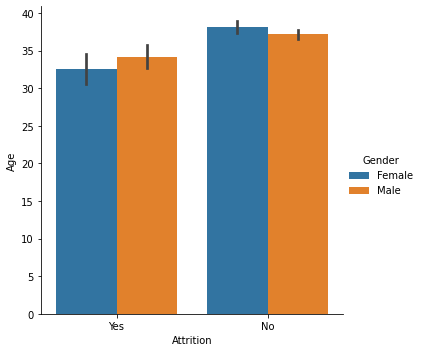

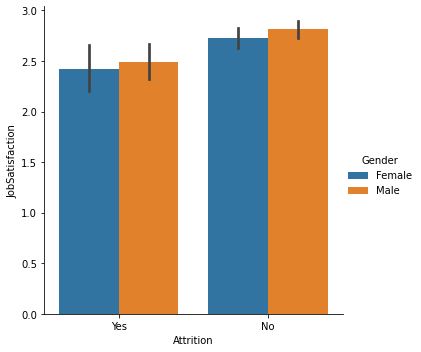

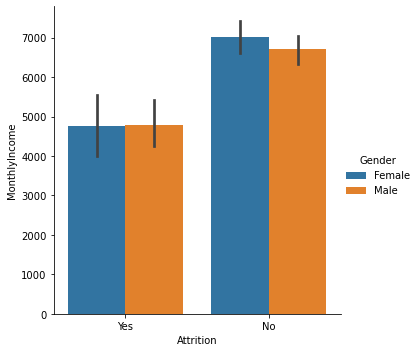

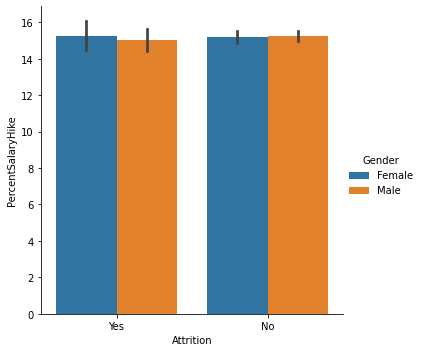

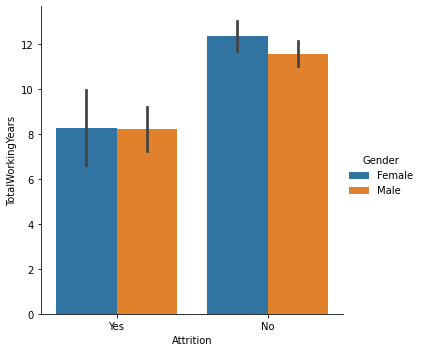

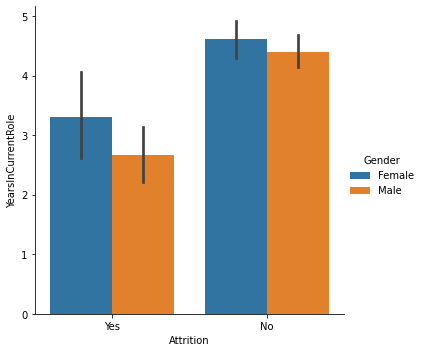

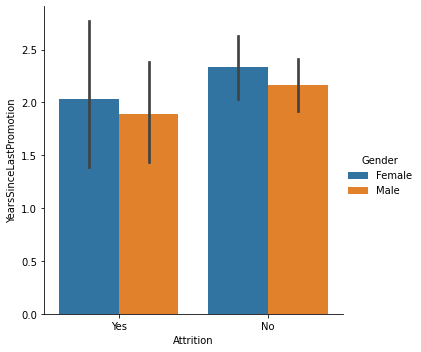

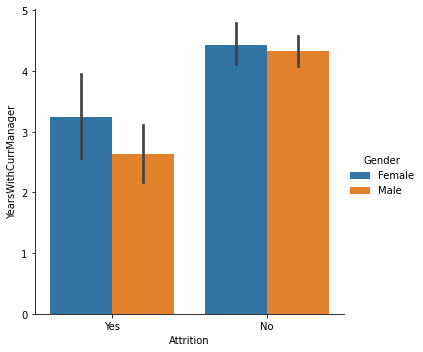

In [27]:
for i in clms:
    sns.catplot(x='Attrition', y=i, hue='Gender', kind='bar', data = df)

- From the above we can observe that for the lesser Job Satisfaction, attrition is more which is natural and obvious.
- The one with lesser monthly income leaves the job which is still logical. The max values for both male and female 
    lies between 4500 and 5000 per month.
- There is no issue with the salary hike.
- For the total working years the ones with lesser number are leaving the job more frequently. The max values for both is 8 years.
- Similarly attrition is high and that too for the females who are working in the current role.
- Similar observations are observed for the years since last promotion and the years working with the current manager.

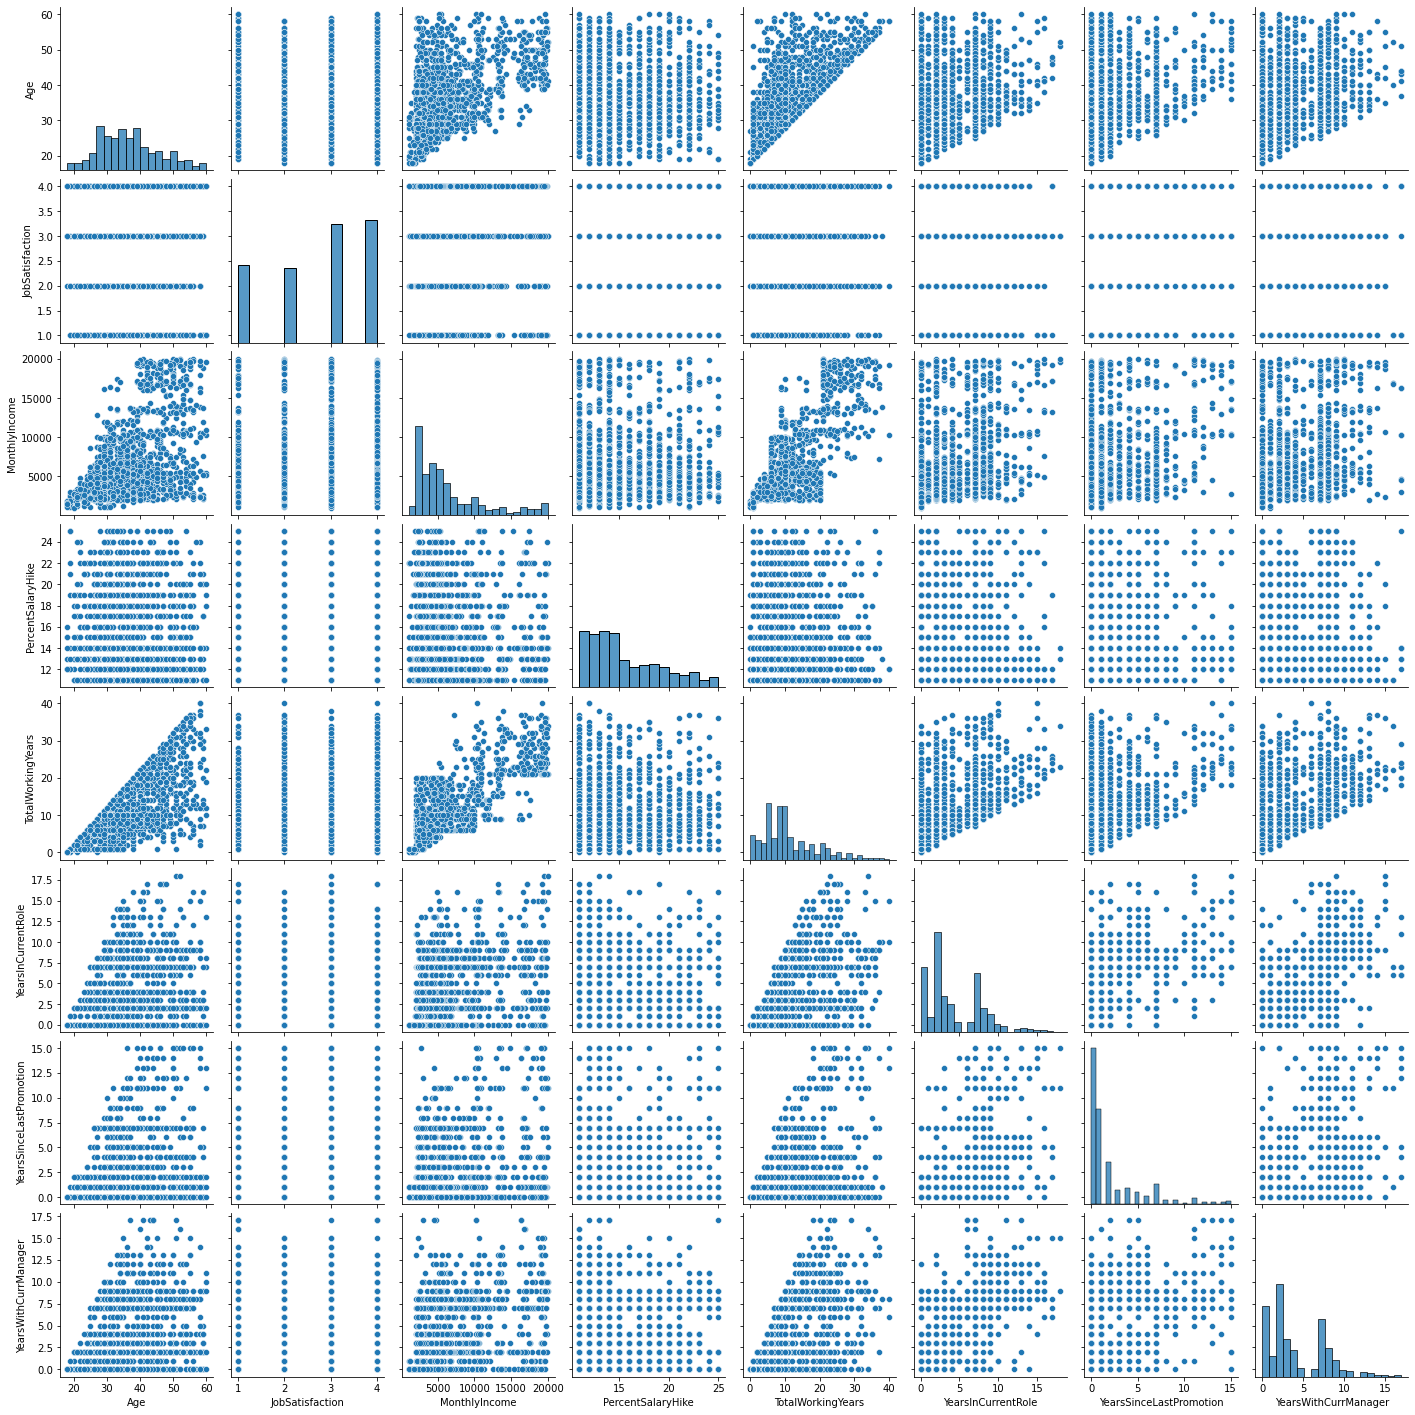

In [28]:
# sns.set()
# sns.pairplot(df[clms],height = 5 ,kind ='scatter',diag_kind='kde')
# plt.show()

sns.pairplot(df[clms], kind ='scatter')

- Not much can be concluded from the above plot.

## A little bit pre-processing

In [29]:
df.dtypes[df.dtypes == 'object']

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
dtype: object

In [30]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
df['Attrition'].replace({'Yes':1, 'No':0}, inplace = True)
df['Attrition'].unique()

array([1, 0], dtype=int64)

In [32]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [33]:
df['BusinessTravel'].replace({'Travel_Frequently':2, 'Travel_Rarely':1, 'Non-Travel':0}, inplace = True)
df['BusinessTravel'].unique()

array([1, 2, 0], dtype=int64)

In [34]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [35]:
df['Department'].replace({'Research & Development':2, 'Human Resources':1, 'Sales':0}, inplace = True)
df['Department'].unique()

array([0, 2, 1], dtype=int64)

In [36]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [37]:
label_encoder = preprocessing.LabelEncoder()
df['EducationField'] = label_encoder.fit_transform(df['EducationField'])
df['EducationField'].unique()

array([1, 4, 3, 2, 5, 0])

In [38]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [39]:
df['Gender'].replace({'Male':1, 'Female':0}, inplace = True)
df['Gender'].unique()

array([0, 1], dtype=int64)

In [40]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [41]:
df['JobRole'] = label_encoder.fit_transform(df['JobRole'])
df['JobRole'].unique()

array([7, 6, 2, 4, 0, 3, 8, 5, 1])

In [42]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [43]:
df['MaritalStatus'].replace({'Married':2, 'Single':1, 'Divorced':0}, inplace = True)
df['MaritalStatus'].unique()

array([1, 2, 0], dtype=int64)

In [44]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [45]:
df['OverTime'].replace({'Yes':1, 'No':0}, inplace = True)
df['OverTime'].unique()

array([1, 0], dtype=int64)

In [46]:
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               1       1102           0                 1   
1   49          0               2        279           2                 8   
2   37          1               1       1373           2                 2   
3   33          0               2       1392           2                 3   
4   27          0               1        591           2                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2               1                        2       0          94   
1          1               1                        3       1          61   
2          2               4                        4       1          92   
3          4               1                        4       0          56   
4          1               3                        1       1          40   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2        7                4              1   
1               2         2        6                2              2   
2               2         1        2                3              1   
3               3         1        6                3              2   
4               3         1        2                2              2   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0           5993        19479                   8         1   
1           5130        24907                   1         0   
2           2090         2396                   6         1   
3           2909        23159                   1         1   
4           3468        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

### Checking for the Outliers

In [48]:
df.shape

(1470, 31)

<AxesSubplot:>

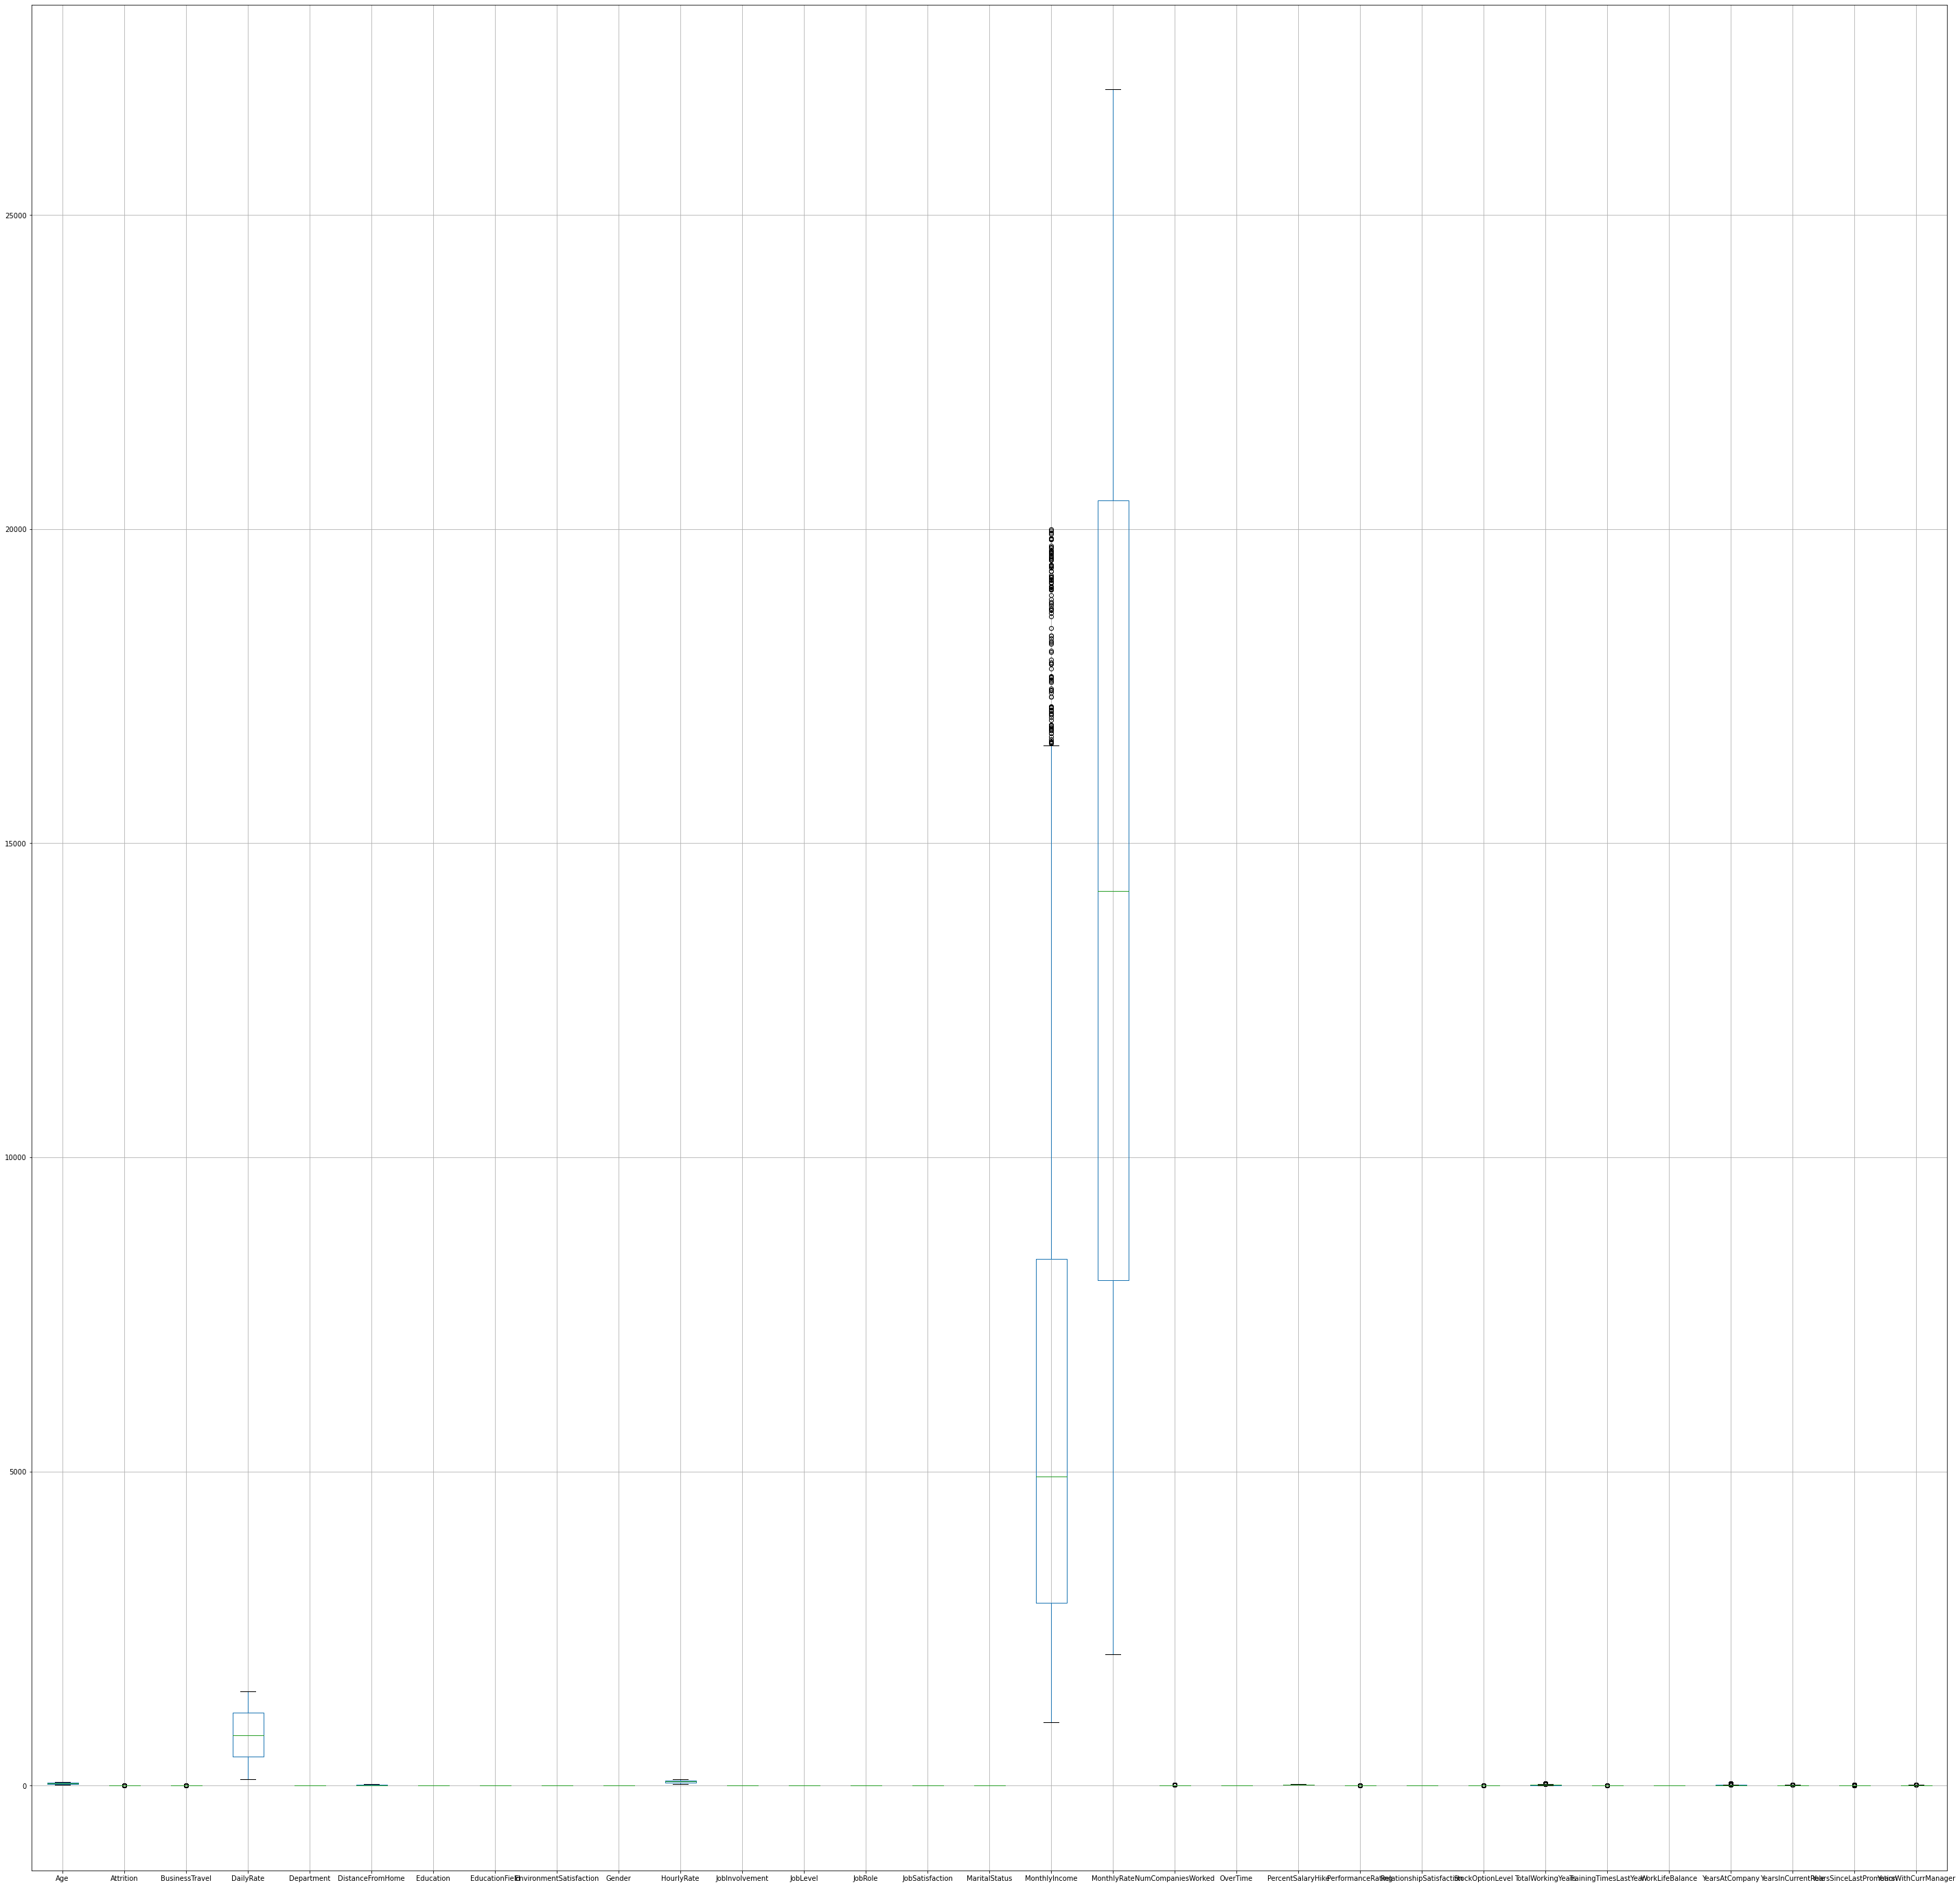

In [49]:
plt.figure(figsize=(50,50))
df.boxplot()

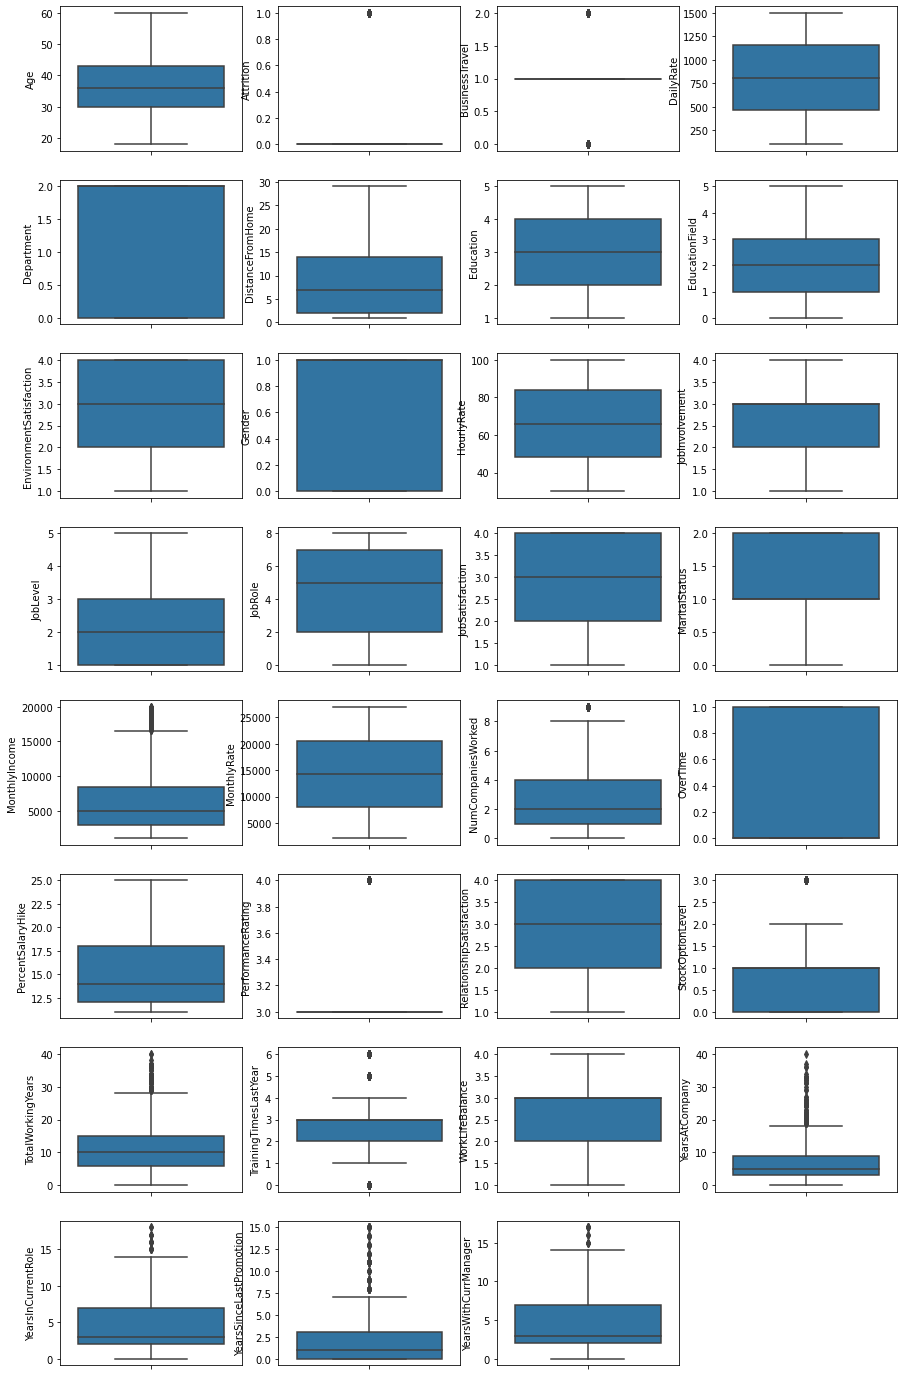

In [50]:
i = 1
plt.figure(figsize=(15,25))
for features in df.columns:
    plt.subplot(8,4,i)
    sns.boxplot(y=df[features])
    i+=1

- Some features have outliers value but some can be important ones.

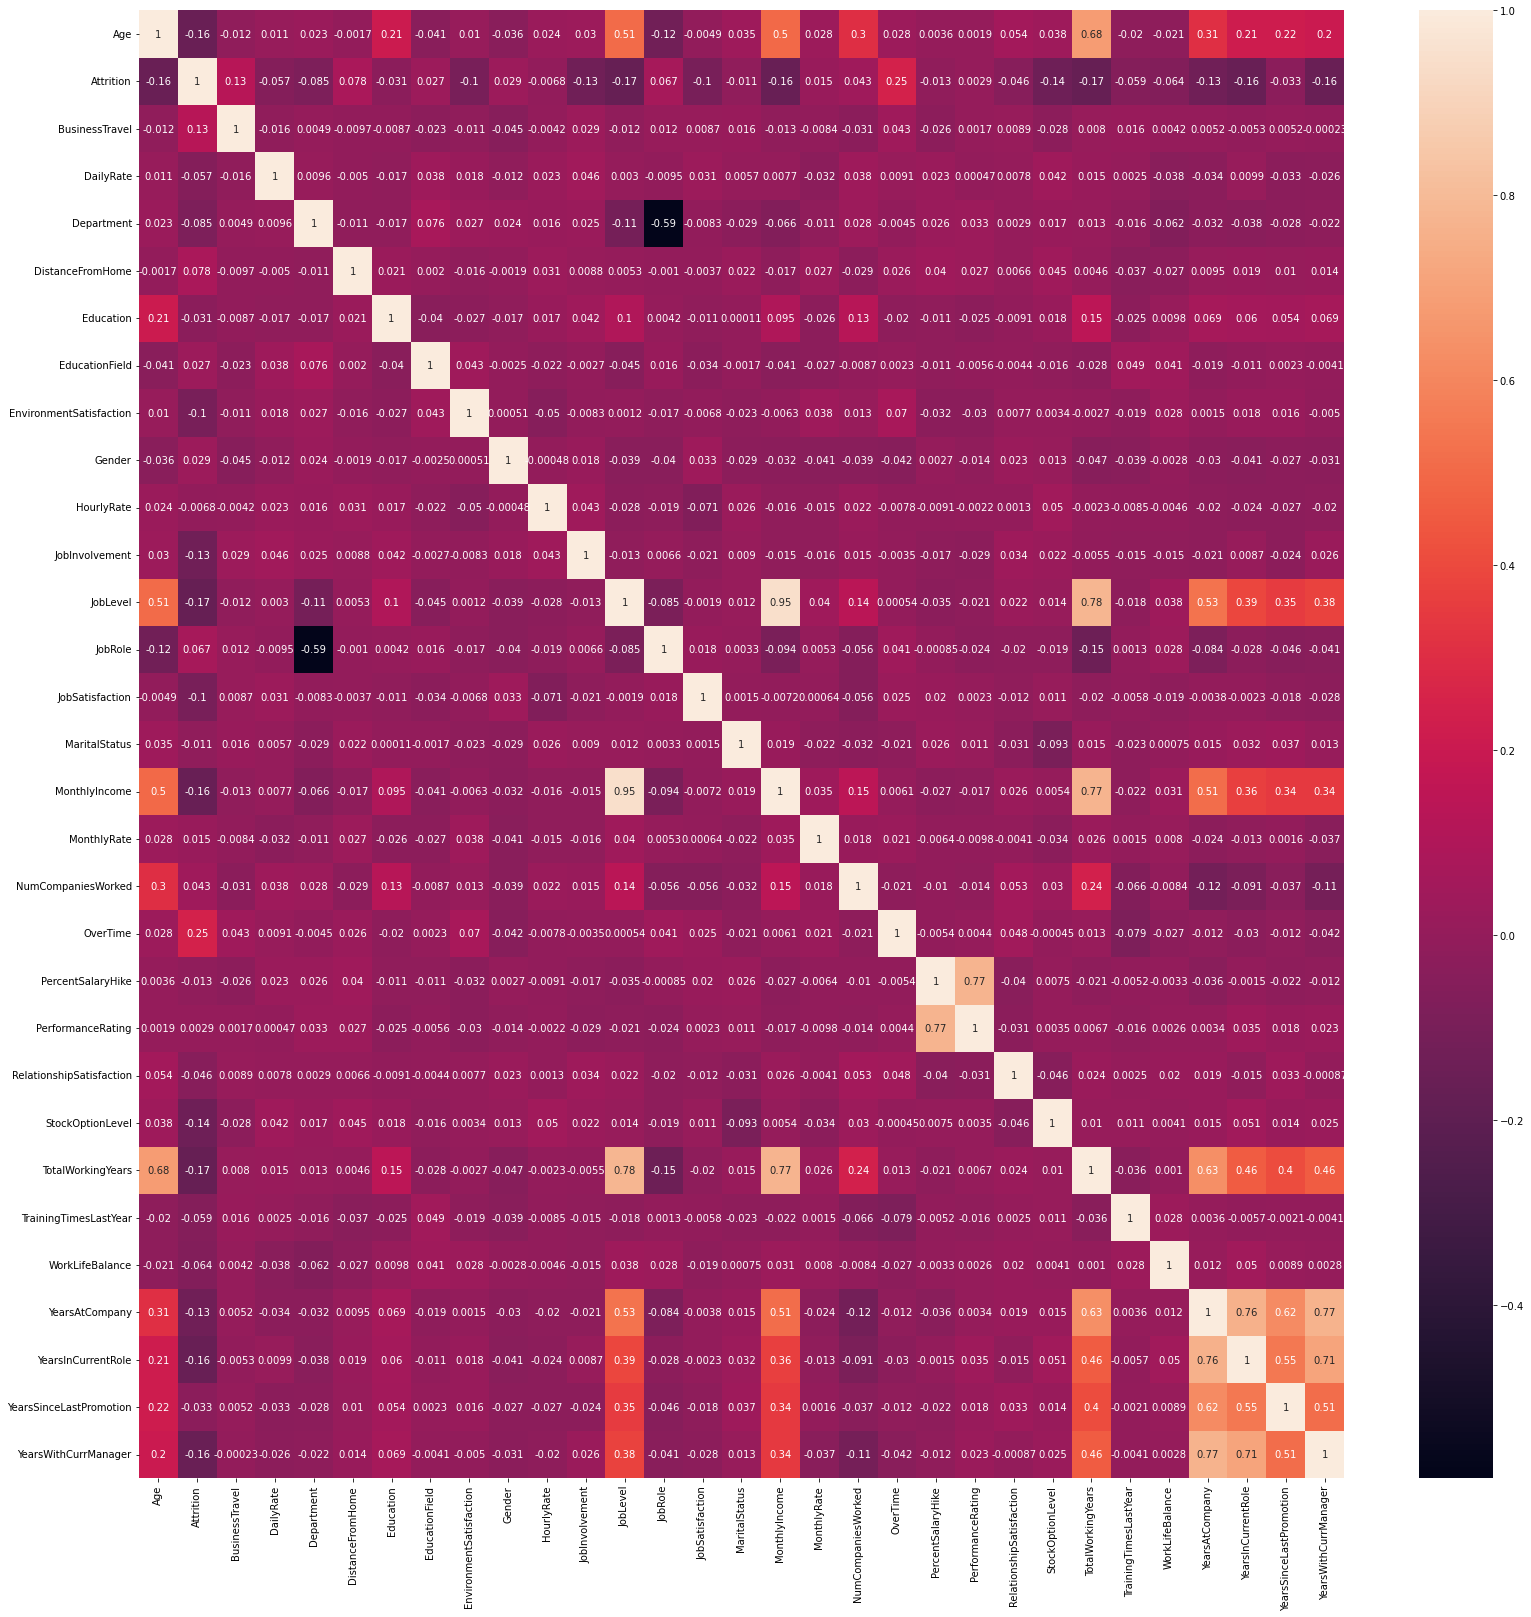

In [51]:
correlation = df.corr()
plt.figure(figsize = (27,27))
sns.heatmap(correlation, annot=True)
plt.show()

### Scaling down the data

#### Normalization

In [52]:
normal_scaler = MinMaxScaler()
scaled_data = normal_scaler.fit_transform(df)
df = pd.DataFrame(scaled_data,columns=df.columns)
df

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     0.547619        1.0             0.5   0.715820         0.0   
1     0.738095        0.0             1.0   0.126700         1.0   
2     0.452381        1.0             0.5   0.909807         1.0   
3     0.357143        0.0             1.0   0.923407         1.0   
4     0.214286        0.0             0.5   0.350036         1.0   
5     0.333333        0.0             1.0   0.646385         1.0   
6     0.976190        0.0             0.5   0.874732         1.0   
7     0.285714        0.0             0.5   0.899069         1.0   
8     0.476190        0.0             1.0   0.081603         1.0   
9     0.428571        0.0             0.5   0.856836         1.0   
10    0.404762        0.0             0.5   0.506084         1.0   
11    0.261905        0.0             0.5   0.036507         1.0   
12    0.309524        0.0             0.5   0.406586         1.0   
13    0.380952        0.0             0.5   0.890480         1.0   
14    0.238095        1.0             0.5   0.000716         1.0   
15    0.261905        0.0             0.5   0.921260         1.0   
16    0.333333        0.0             0.5   0.166070         1.0   
17    0.095238        0.0             0.0   0.730852         1.0   
18    0.833333        0.0             0.5   0.799571         0.0   
19    0.476190        0.0             0.5   0.192555         1.0   
20    0.142857        0.0             0.0   0.408733         1.0   
21    0.428571        1.0             0.5   0.798855         0.0   
22    0.380952        0.0             0.5   0.226915         1.0   
23    0.071429        0.0             0.5   0.206872         1.0   
24    0.380952        1.0             0.5   0.427344         1.0   
25    0.833333        0.0             0.5   0.844667         1.0   
26    0.333333        1.0             1.0   0.732283         1.0   
27    0.571429        0.0             0.5   0.421618         0.0   
28    0.619048        0.0             0.5   0.268432         1.0   
29    0.666667        0.0             0.5   0.431639         0.0   
30    0.357143        0.0             0.5   0.588404         1.0   
31    0.619048        0.0             0.5   0.971367         1.0   
32    0.285714        0.0             0.5   0.016464         1.0   
33    0.500000        1.0             0.5   0.567645         0.0   
34    0.142857        1.0             0.5   0.508948         1.0   
35    0.595238        0.0             0.5   0.838225         1.0   
36    0.761905        1.0             0.5   0.549034         0.0   
37    0.404762        0.0             0.5   0.564066         0.0   
38    0.428571        0.0             0.5   0.536865         1.0   
39    0.357143        0.0             1.0   0.743737         0.0   
40    0.404762        0.0             0.5   0.259127         1.0   
41    0.214286        0.0             0.5   0.814603         1.0   
42    0.190476        1.0             0.5   0.898354         1.0   
43    0.214286        0.0             1.0   0.638511         0.0   
44    0.285714        0.0             1.0   0.443092         1.0   
45    0.547619        1.0             0.5   0.900501         1.0   
46    0.380952        0.0             0.0   0.689334         0.0   
47    0.452381        0.0             0.5   0.219041         1.0   
48    0.666667        0.0             1.0   0.793844         0.0   
49    0.404762        0.0             0.5   0.806729         1.0   
50    0.714286        1.0             0.5   0.375089         1.0   
51    0.238095        1.0             0.5   0.953472         1.0   
52    0.619048        0.0             0.5   0.992126         0.0   
53    0.404762        0.0             0.0   0.712241         1.0   
54    0.190476        0.0             0.5   0.959914         0.0   
55    0.357143        0.0             1.0   0.295634         1.0   
56    0.404762        0.0             1.0   0.537581         0.0   
57    0.404762        0.0             0.5   0.744452         1.0   

<AxesSubplot:>

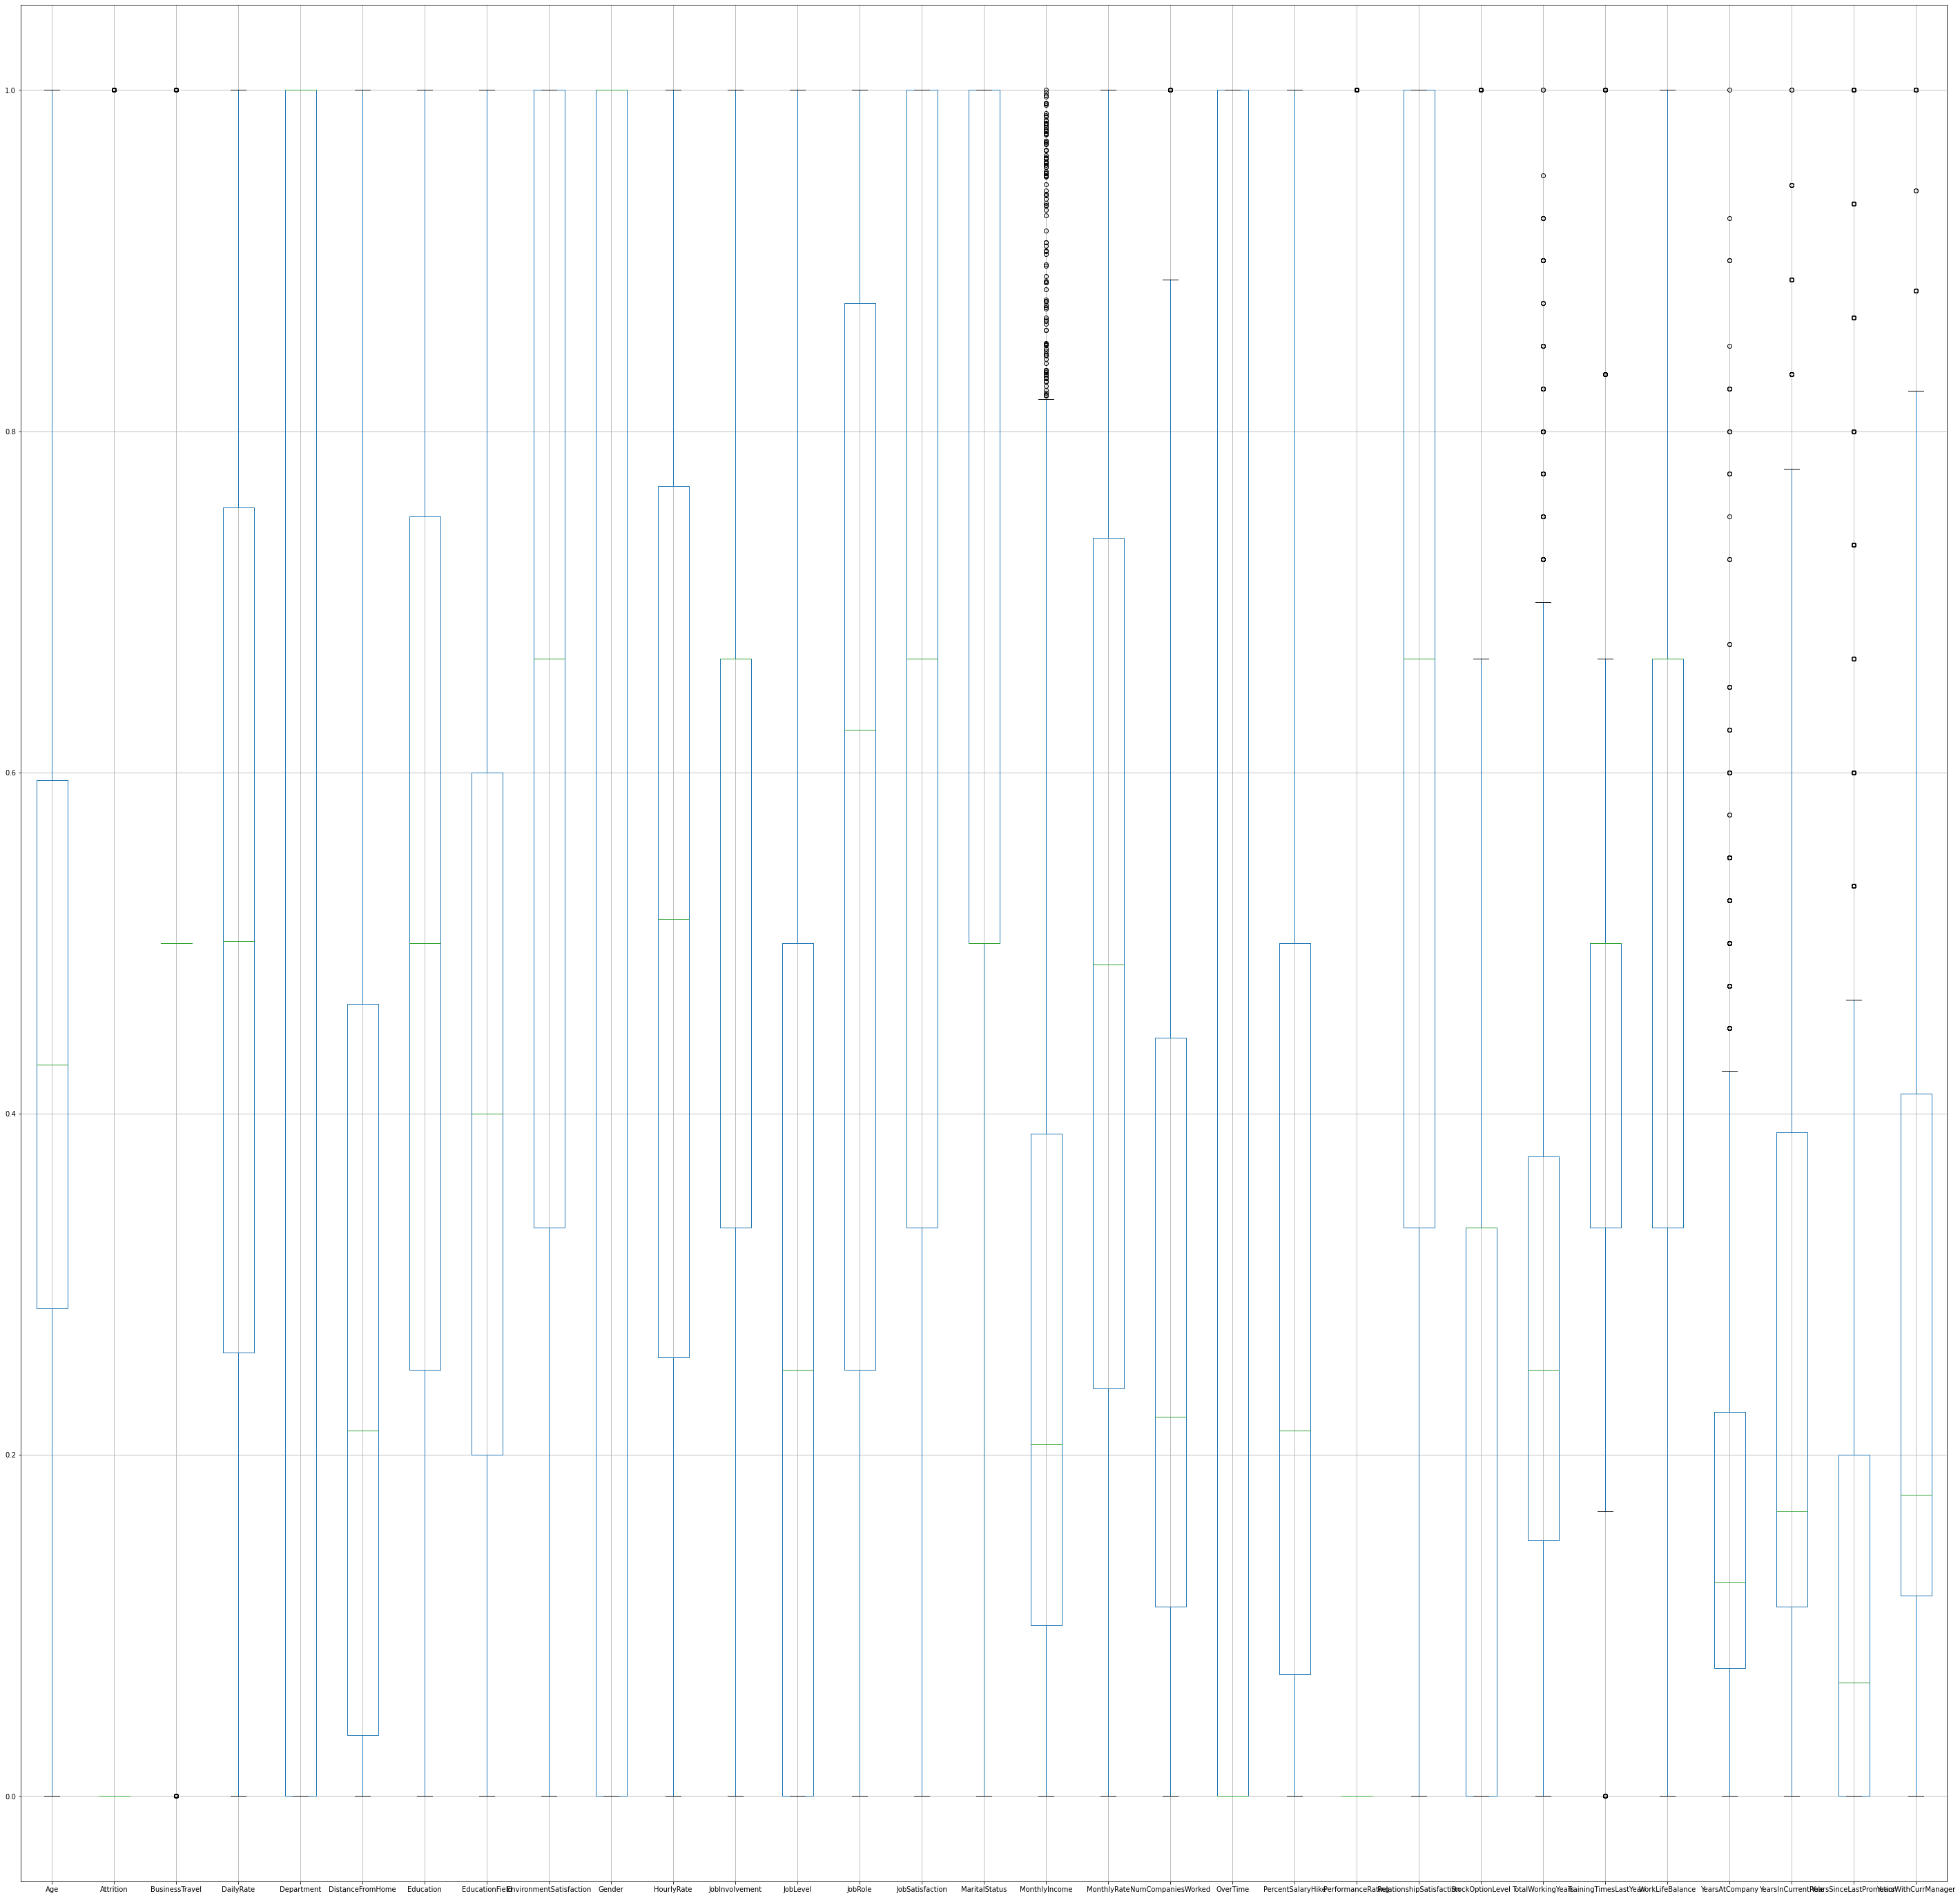

In [53]:
plt.figure(figsize=(50,50))
df.boxplot()

## Building the model

### Splitting the data

In [54]:
x = df.drop('Attrition', axis = 1)
y = df.Attrition

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [56]:
y_test.value_counts()

0.0    246
1.0     48
Name: Attrition, dtype: int64

In [57]:
y_train.value_counts()

0.0    987
1.0    189
Name: Attrition, dtype: int64

In [58]:
246/48, 987/189

(5.125, 5.222222222222222)

## Logistic regression

### Creating an instance of the model

In [59]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

### Predicting the values

In [60]:
logReg_ypred = log_reg.predict(x_test)
logReg_ypred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [61]:
y_test

405     1.0
272     0.0
1382    0.0
898     0.0
724     0.0
177     1.0
870     0.0
88      0.0
354     0.0
1172    0.0
892     1.0
127     1.0
1355    0.0
61      0.0
130     0.0
1306    0.0
422     1.0
1229    0.0
1436    0.0
616     0.0
824     0.0
340     0.0
449     0.0
505     0.0
994     0.0
733     0.0
605     0.0
514     1.0
1016    1.0
325     0.0
1068    1.0
996     0.0
214     1.0
1275    0.0
1411    0.0
70      0.0
1405    0.0
1073    0.0
499     0.0
1441    0.0
1118    0.0
942     0.0
324     0.0
294     0.0
1374    0.0
641     0.0
1094    0.0
1109    0.0
461     0.0
316     0.0
1188    0.0
464     0.0
658     0.0
42      1.0
107     1.0
1189    0.0
592     0.0
802     0.0
246     0.0
785     0.0
744     1.0
378     1.0
1231    0.0
117     0.0
1264    0.0
22      0.0
1243    0.0
201     0.0
612     0.0
610     0.0
871     1.0
538     0.0
568     1.0
93      0.0
484     0.0
1111    1.0
770     0.0
426     0.0
262     0.0
53      0.0
1466    0.0
194     0.0
1179    0.0
82  

### Evaluating the model

#### Confusion matrix

In [62]:
logReg_conMatrix = confusion_matrix(y_test, logReg_ypred)
logReg_conMatrix

array([[240,   6],
       [ 27,  21]], dtype=int64)

In [63]:
# Precision - Tp/(Tp+Fp)

21/(21+6)

0.7777777777777778

In [64]:
precision_score(y_test, logReg_ypred)

0.7777777777777778

In [65]:
# Recall - Tp/(Tp+Fn)

21/(21+27)

0.4375

In [66]:
recall_score(y_test, logReg_ypred)

0.4375

In [67]:
# accuracy >> Tp+Tn/Tp+Tn+Fp+Fn

(21+240)/(21+240+27+6)

0.8877551020408163

In [68]:
accuracy_score(y_test, logReg_ypred)

0.8877551020408163

In [69]:
print(classification_report(y_test, logReg_ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       246
         1.0       0.78      0.44      0.56        48

    accuracy                           0.89       294
   macro avg       0.84      0.71      0.75       294
weighted avg       0.88      0.89      0.87       294



In [70]:
logReg_ypredProb = log_reg.predict_proba(x_test)
logReg_ypredProb

array([[8.20373181e-01, 1.79626819e-01],
       [9.84349179e-01, 1.56508213e-02],
       [8.61283257e-01, 1.38716743e-01],
       [9.98164906e-01, 1.83509369e-03],
       [9.58993981e-01, 4.10060189e-02],
       [7.54825862e-01, 2.45174138e-01],
       [8.92190349e-01, 1.07809651e-01],
       [9.74180151e-01, 2.58198488e-02],
       [5.38152014e-01, 4.61847986e-01],
       [5.24574124e-01, 4.75425876e-01],
       [4.97555050e-01, 5.02444950e-01],
       [2.11900234e-01, 7.88099766e-01],
       [7.71189891e-01, 2.28810109e-01],
       [8.45857396e-01, 1.54142604e-01],
       [8.62003722e-01, 1.37996278e-01],
       [8.88617400e-01, 1.11382600e-01],
       [6.43076639e-01, 3.56923361e-01],
       [7.99781783e-01, 2.00218217e-01],
       [2.71889089e-01, 7.28110911e-01],
       [9.86051176e-01, 1.39488243e-02],
       [6.64958531e-01, 3.35041469e-01],
       [9.82379308e-01, 1.76206920e-02],
       [9.37935898e-01, 6.20641019e-02],
       [8.73050522e-01, 1.26949478e-01],
       [9.401362

In [71]:
roc_auc = roc_auc_score(y_test, logReg_ypred)
roc_auc

0.7065548780487805

<h2><font color='tomato'> Since this score is fair hence we will look for other models and predict the values.</font></h2>

### ROC AUC Curve

In [72]:
fpr, tpr, thresold = roc_curve(y_test, logReg_ypred)
print(fpr,tpr,thresold,sep='\n')

[0.         0.02439024 1.        ]
[0.     0.4375 1.    ]
[2. 1. 0.]


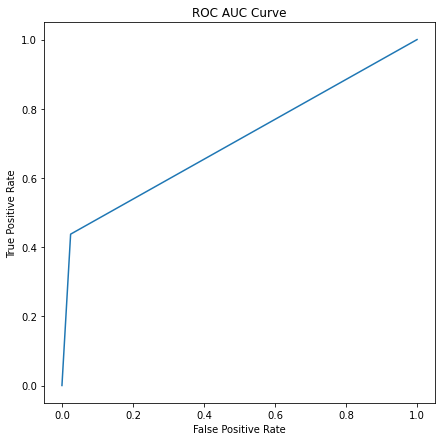

In [73]:
plt.figure(figsize=(7, 7))
plt.title('ROC AUC Curve')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## KNN Classifier

In [74]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [75]:
knn_ypred = knn_classifier.predict(x_test)
knn_ypred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Evaluating the model

In [76]:
accuracy_score(y_test,knn_ypred)

0.8401360544217688

In [77]:
precision_score(y_test,knn_ypred)

0.5384615384615384

In [78]:
recall_score(y_test,knn_ypred)

0.14583333333333334

In [79]:
print(classification_report(y_test,knn_ypred))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       246
         1.0       0.54      0.15      0.23        48

    accuracy                           0.84       294
   macro avg       0.70      0.56      0.57       294
weighted avg       0.80      0.84      0.80       294



In [80]:
kconf_mat = confusion_matrix(y_test,knn_ypred)
kconf_mat

array([[240,   6],
       [ 41,   7]], dtype=int64)

In [81]:
kroc_auc = roc_auc_score(y_test,knn_ypred)
kroc_auc

0.5607215447154471

In [82]:
kfpr,ktpr,kthresold= roc_curve(y_test,knn_ypred)
print(kfpr,ktpr,kthresold,sep='\n')

[0.         0.02439024 1.        ]
[0.         0.14583333 1.        ]
[2. 1. 0.]


Text(0, 0.5, 'True Positive Rate')

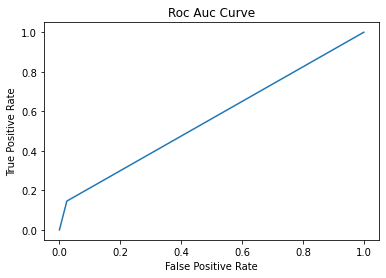

In [83]:
plt.title('Roc Auc Curve')
plt.plot(kfpr,ktpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

<h2> <font color = 'tomato'> Too bad score for KNN Classifier. We'll try for another model.</font></h2>

## Decision Tree

In [84]:
import imblearn
from imblearn.over_sampling import SMOTE

# over = SMOTE(sampling_strategy=0.1)
oversample = SMOTE()
x_smot, y_smot = oversample.fit_resample(x, y)

In [85]:
y_smot.value_counts()

1.0    1233
0.0    1233
Name: Attrition, dtype: int64

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x_smot,y_smot,test_size=0.2,random_state=3)

### Creating the Decision model

In [87]:
decTree_model = DecisionTreeClassifier()
decTree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [88]:
decTree_ypred = decTree_model.predict(x_test)

In [89]:
decTree_predTrain = decTree_model.predict(x_train)

In [90]:
(accuracy_score(y_test,decTree_ypred))*100

85.22267206477733

In [91]:
(accuracy_score(y_train,decTree_predTrain))*100

100.0

In [92]:
confusion_matrix(y_test,decTree_ypred)

array([[199,  42],
       [ 31, 222]], dtype=int64)

In [93]:
print(classification_report(y_test,decTree_ypred))

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       241
         1.0       0.84      0.88      0.86       253

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494



In [94]:
plt.figure(figsize=(200,200))
tree=plot_tree(decision_tree=decTree_model,
               feature_names=df.columns,
               class_names=['0','1'],filled=True)
print('Decision Tree')
# display(tree)
# plt.show(tree)
plt.savefig('Decision Tree.png')

Decision Tree


In [95]:
DT_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
DT_model.fit(x_train,y_train)
y_pred_tuned=DT_model.predict(x_test)
accuracy_score(y_test,y_pred_tuned)

0.8360323886639676

In [96]:
y_pred_tuned_train=DT_model.predict(x_train)
accuracy_score(y_train,y_pred_tuned_train)

0.8544624746450304

### Grid Search CV

In [97]:
DT_model = DecisionTreeClassifier()

In [98]:
hyperparameters = {'criterion':["entropy",'Gini'],
                    'max_depth':np.arange(4,25),
                  'min_samples_leaf':np.arange(2,4),
                  'min_samples_split':np.arange(2,4)}
gscv_dt_model=GridSearchCV(DT_model,hyperparameters,cv=3)
gscv_dt_model

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'Gini'],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24]),
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3])})

In [99]:
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'Gini'],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24]),
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3])})

In [100]:
gscv_dt_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [101]:
y_pred_gscv=gscv_dt_model.predict(x_test)
accuracy_score(y_test,y_pred_gscv)

0.8825910931174089

In [102]:
y_pred_train_gscv=gscv_dt_model.predict(x_train)
accuracy_score(y_train,y_pred_train_gscv)

0.9787018255578094

### Randomized Search CV

In [103]:
hyperparameters = {'criterion':["entropy",'Gini'],
                    'max_depth':np.arange(4,100),
                  'min_samples_leaf':np.arange(2,20),
                  'min_samples_split':np.arange(2,10)}
rscv_dt_model=RandomizedSearchCV(DT_model,hyperparameters)
rscv_dt_model

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'Gini'],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [104]:
rscv_dt_model.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'Gini'],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [105]:
rscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=3,
                       min_samples_split=7)

In [106]:
y_pred1=rscv_dt_model.predict(x_test)
accuracy_score(y_test,y_pred1)

0.8704453441295547

### Pruning

In [107]:
DT_model

DecisionTreeClassifier()

In [108]:
dt_values=DT_model.cost_complexity_pruning_path(x_train,y_train)
dt_values
ccp_alpha_list=dt_values['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00046809, 0.00047329, 0.00047438, 0.00047893,
       0.00048174, 0.00048295, 0.00048682, 0.0004902 , 0.00049434,
       0.00049658, 0.00049762, 0.00049836, 0.00049953, 0.00050025,
       0.0005006 , 0.000505  , 0.0005071 , 0.00067613, 0.00067613,
       0.00067613, 0.00067613, 0.00067613, 0.00076065, 0.00076065,
       0.00076065, 0.00081136, 0.00081136, 0.00081136, 0.00081136,
       0.00082519, 0.00084517, 0.00085869, 0.00086931, 0.00086931,
       0.00090151, 0.00091714, 0.000922  , 0.00092968, 0.00093865,
       0.00094659, 0.00094944, 0.00095081, 0.00096082, 0.00096135,
       0.0009659 , 0.0009701 , 0.00097363, 0.00097393, 0.00097468,
       0.00100586, 0.0010091 , 0.0010402 , 0.0010402 , 0.00116723,
       0.00121704, 0.00124098, 0.00124386, 0.00127289, 0.00127985,
       0.0013476 , 0.00135227, 0.00135227, 0.00135227, 0.00144242,
       0.00144886, 0.00144886, 0.00149147, 0.0015213 , 0.0015291 ,
       0.0016596 , 0.00171634, 0.00177532, 0.00178976, 0.00180

In [109]:
train_accuracy=[]
test_accuracy=[]

for ccp_alpha in ccp_alpha_list:
    DT_ml_model= DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    DT_ml_model.fit(x_train,y_train)
    train_accuracy.append(DT_ml_model.score(x_train,y_train))
    test_accuracy.append(DT_ml_model.score(x_test,y_test))

In [110]:
max(test_accuracy)

0.8663967611336032

In [111]:
len(test_accuracy)

118

In [112]:
test_accuracy.index(max(test_accuracy))

13

In [113]:
ccp_alpha_list[62]

0.001352265043948614

In [114]:
##traing accuracy for sselected alpha value
train_accuracy[62]

0.9503042596348884

<Figure size 2160x1440 with 0 Axes>

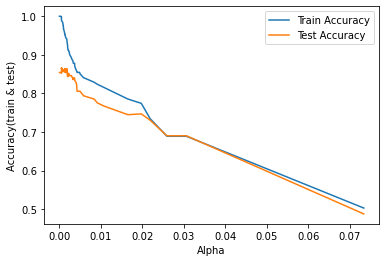

In [115]:
plt.figure(figsize=(30,20))
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list,train_accuracy,label='Train Accuracy')
ax.plot(ccp_alpha_list,test_accuracy,label='Test Accuracy')
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy(train & test)')
ax.legend()

In [116]:
Decision_model=DecisionTreeClassifier(random_state=12,ccp_alpha=0.006005958291956326)
Decision_model.fit(x_train,y_train)
Decision_model.score(x_train,y_train),Decision_model.score(x_test,y_test)

(0.84026369168357, 0.7935222672064778)